<a href="https://colab.research.google.com/github/jslapp3/QTM-350/blob/main/Copy_of_Group_4_HW2_Fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
Complete the exercises working in your group. You may share the notebook with your group members using the share button in the upper right. Be careful with this feature. Although similar to Google Docs in functionality, you will notice that if two people are working on the same cell at the same time, then you may lose your work in that cell. 

# Question 1
## API practice
Using the New York Times API, answer the following questions.
1. What book is number n on the bestseller list where n is your group number? (Use code to obtain and show code)
2. What does the cover look like? Use code to obtain a picture of it using the API. Include a picture here using markdown.
3. How much is it on Amazon? (Use code to obtain and show code)
4. How long was it on the bestseller list for? (Use code to obtain and show code)
 


In [ ]:
# Call the api to the NYtimes bestseller list

!curl --request GET -o current-hardcover-fiction.json "https://api.nytimes.com/svc/books/v3/lists/current/hardcover-fiction.json?api-key=jiF1V7lBL4xwrxx0GvMgVmQsKdkWagOJ"

In [ ]:
!ls

!sudo apt-get install jq

!jq < current-hardcover-fiction.json

!jq '.results | .books' < current-hardcover-fiction.json > bestsellers.json

In [ ]:
import pandas as pd
pd.read_json('bestsellers.json')
df = pd.read_json('bestsellers.json')
df.to_csv('bestsellers.csv')

In [ ]:
!ls

In [ ]:
df.head(10)

The following displays the book ranked number four on the list since we are a part of homework group four.

In [ ]:
df.loc[df['rank'] == 4]

2. What does the cover look like? Use code to obtain a picture of it using the API. Include a picture here using markdown.
3. How much is it on Amazon? (Use code to obtain and show code)
4. How long was it on the bestseller list for? (Use code to obtain and show code)

In [ ]:
ourbook = df.loc[df['rank'] == 4]

In [ ]:
ourbook['amazon_product_url']

!wget ourbook['amazon_product_url']

In [ ]:
ourbook['weeks_on_list']

# Question 2
## Reading the classics
Among your group members, discuss the classics, e.g. books and authors found on Project Gutenberg, that you had read and loved, or hated. See Notebook 4 from the text for the link to this site as well as more details. Include your discussion in your notebook, along with pictures or links to the books to give the reader a sense of the books.

Create three (or more) metrics that could measure what it was that you loved or hated about the books. Code the metric as a Python function. Explain each metric, including why you think it is a useful or interesting way to measure a book. For instance, a count of unique words could be a metric to measure vocabulary. Average sentence length could be a measure of the author's style. The frequency and distribution of the length of words could provide insights into the use of 'big' words by the author. 

Then, use `wget` to obtain the text of the books you discussed from Project Gutenberg, implement the metrics you created in Python, and analyze the books using these metrics. 

Hypothesize what you expect to find in the books before the analysis, and then discuss what you actually found. As much as possible, narrate and explain the insights provided by your metrics when appropriate.  If you are unsure how to get started, begin with the code the textbook used to analyze War and Peace, make simple modifications to it, justifying at each step what effect you expect your modification to have, and the actual impact it did have. For instance, instead of looking at a count of unique words, look at the max or min of this count.  

In [ ]:
import os

if not os.path.exists('2701-0.txt'):
    !wget https://www.gutenberg.org/files/2701/2701-0.txt

The first book that we chose is Moby-dick or the whale by Herman Melville. We chose to analyze this book because this book is one of the famous novel that people have heard of. Although it is well-known novel, some people, including Ryan, might have hesitated to read it as it has 135 chapters. This made us curious, so we decided to determine the author's writing style and what made this book so long. Through this analysis, we hope potential readers learn about this book and have interest in it. The link to the book is https://www.gutenberg.org/files/2701/2701-0.txt.

Our group hyothesize that this book will have more unique words, lines, and sentences as the book has 135 chapters which is longer than the average novel. 

We searched stackoverflow to find how to insert image into the notebook.

https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python

In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://images-na.ssl-images-amazon.com/images/I/51aqe85GMwL._SX332_BO1,204,203,200_.jpg')
img = Image.open(BytesIO(response.content))
img

Here is a short abstract to the book.

Moby-Dick; or, The Whale is an 1851 novel by American writer Herman Melville. The book is the sailor Ishmael's narrative of the obsessive quest of Ahab, captain of the whaling ship Pequod, for revenge against Moby Dick, the giant white sperm whale that on the ship's previous voyage bit off Ahab's leg at the knee.

From: https://en.wikipedia.org/wiki/Moby-Dick#:~:text=Moby%2DDick%3B%20or%2C%20The,Ahab's%20leg%20at%20the%20knee.

The code below allows us to open the book

In [ ]:
fp = open('2701-0.txt')
fp

#### How many words did the author use?




In [ ]:
fp = open('2701-0.txt')
count_words = 0
for line in fp:
    count_words += len(line.split())
count_words
print( 'There are ' + str(count_words) +' words')

We used the loop to split the words in the ine and count the number of the words. As the loop counts one word, it will add 1 to the count_words and the result shows that there are 215,864 words. Since the average novel has about 70,000 to 120,000 words, we can clearly see that this book has more word than the average novel. We thought that making this metrics would help readers to notice the approximate level of this book.

#### How many lines are there?


In [ ]:
fp = open('2701-0.txt')
count_line = 0
for line in fp:
    count_line += 1
count_line
print ( 'There are ' + str(count_line) + ' lines')   

Similar to how we found the number of word used, we just added 1 everytime the code recognizes a line. Compared to pervious metrics, it was much easier to do because we didn't had to find the length of splitted line. There are 22,316 lines. We can see that there are lots of lines in the book but one thing to notice is that it is a number of lines not sentences. We thought that this metrics is helpful because the readers can notice how long the book is if they read it from the gutenberg.

#### What is the average word count in a sentence?


In [ ]:
blank = []
fp = open('2701-0.txt')
text = fp.read()
text = text.replace('\n', ' ')
sentences = text.split('.')
for sentence in sentences:
        words = sentence.split(' ')
        blank.append(len(words))
average_wordcount_in_sentences = sum(blank)/len(sentences)

print ( "There are " + str(len(sentences)) + ' sentences')

print("There are " + str(round(average_wordcount_in_sentences,1)) + ' words in a sentence')

We first created a array name blank. After spliting the text into the sentences (by spliting the period), we then divided words by spliting the space used after the word. Then, we append the length of the words into the array. Since sum(blank) code just prints out the blank, we used it to represent the number of words. Then, used len(sentences) to count the number of sentences used. We could use len(blank) but we wanted to approach the answer in mathematical way. We found out that there are 8,195 sentences and about 27.8 words were used in a sentence. We could also found out that one sentence used about 2.7 lines. This represents that the author uses lots of word to write one sentence, proving why this book uses so many words. We thought that this metrics is useful because readers can estimate the writing style of the author because all readers have different preference in the book.

#### How many unique words  used?

In [ ]:
no_punct = ""
punctuations =  '''!()-[]{};:’"\,<>“”./?@#$%^&*_~'''
for char in text:
   if char not in punctuations:
       no_punct = no_punct + char
no_punct = no_punct.lower()
mystring = no_punct.replace('\n', ' ')
mystrings = mystring.split()
uni = set(mystrings)
print(len(uni))

Although there are 215,864 words in the book, we thought that it is important to find out how many unique words are used. First, we took out of all of the punctuations from the text. It took a lot of time because the punctuation used in the book are different with the normal punctuation that we could type. Thus, we had to copy and paste it from the text. Then, we created a no_punct text by adding the original text with character. Then, we changed all of the characters into lower case and replaced \n (starting next line) with space. We splited the resulted text to extract the words and used set code to not count the used word. As a result, we found out that 20,352 unique words were used. Usually, the authors use about 10,000 unique words, thus we can see how many unique words the author used. We thought that this metrics can help readers by noticing how many different words were used. Based on this, they can predict the level of this book and vocabs. 

#### Most frequently used word

In [ ]:
import collections
import re
words = re.findall(r'\w+', open('2701-0.txt').read().lower())
Counter = collections.Counter(words)
Counter.most_common(22)


We used collection package to find the frequency of using a specific word. Once again, we switched all of the words into the lower case. Then, used collections.counter function to list out frequently used words. We chose until 22 because top 1~21 words are either article or prepositions. Since this book is about whale, the author used the word whale often. We used this metrics to entertain readers because they can learn how many articles and grammatical words are used in a novel. Also, they can easily see the words that were used by just simply changing the number in the code.

## Second Book

In [ ]:
import os

if not os.path.exists('1342-0.txt'):
    !wget https://www.gutenberg.org/files/1342/1342-0.txt


The second book we chose is pride and prejudice written by Jane Austen. We chose to analyze this book because this book is also well known to the readers. However, it is less famous than Moby-dick so we thought it could also give great insight to the readers. Also, when we first opened the book, we noticed that there are only 61 chapters in the book. Thus, we thought that this would be a greate comparision with our previous book. The link to the book is

https://www.gutenberg.org/files/1342/1342-0.txt.

Our group hypothesize that this book will have an average amount of words, lines and sentences. It will have much less words, lines, and sentences than that of Moby-dick.

In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://target.scene7.com/is/image/Target/GUEST_6ed2d767-15f7-447e-aecc-d2e8a7a838f7?wid=488&hei=488&fmt=pjpeg')
img2 = Image.open(BytesIO(response.content))
img2

The abstract of this book is written below.

Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work "her own darling child" and its vivacious heroine, Elizabeth Bennet, "as delightful a creature as ever appeared in print." The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen's radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book the most superb comedy of manners of Regency England. 

From: https://www.goodreads.com/book/show/1885.Pride_and_Prejudice

In [ ]:
fp = open('1342-0.txt')
fp

#### How many words did the author use?


In [ ]:
fp = open('1342-0.txt')
count_words = 0
for line in fp:
    count_words += len(line.split())
count_words
print( 'There are ' + str(count_words) +' words')

According to our code, we found that about 124,749 books words were used. Compared to that of Moby-dick, it is almost half of the words used for Moby-dick. Based on the codes that we used before, we just chaned the text name.

#### How many lines are there?


In [ ]:
fp = open('1342-0.txt')
count_line = 0
for line in fp:
    count_line += 1
count_line
print ( 'There are ' + str(count_line) + ' lines')  

Based on our code, there are 14,579 lines used in this book. This is also much less than the line of Moby-dick. We can figure out that the readers can easily reach out to read this book. 

#### What is the average word count in a sentence?


In [ ]:
blank2 = []
fp = open('1342-0.txt')
text2 = fp.read()
text2 = text2.replace('\n', ' ')
sentences2 = text2.split('.')
for sentence2 in sentences2:
        words2 = sentence2.split(' ')
        blank2.append(len(words2))
average_wordcount_in_sentences2 = sum(blank2)/len(blank2)

print ( "There are " + str(len(blank2)) + ' sentences')

print("There are " + str(round(average_wordcount_in_sentences2,1)) + ' words in a sentence')


Our code shows that there are 6,404 sentences in this book and about 31.9 words are used for one sentence. Although, this book has less number of words, lines, and sentences, there are much more words used for a sentence. We can notice that the author favors to write long sentences.

#### How many unique words  used?

In [ ]:
no_punct2 = ""
punctuations =  '''!()-[]{};:’"\,<>“”./?@#$%^&*_~'''
for char in text2:
   if char not in punctuations:
       no_punct2 = no_punct2 + char
no_punct2 = no_punct2.lower()
mystring = no_punct2.replace('\n', ' ')
mystrings = mystring.split()
uni = set(mystrings)
print(len(uni))

Since less amount of words were used, there are only 7,135 unique words used. Although the author likes to write long sentences, she didn't use various kind of words. This is less than a half of unique words used in Moby-dick.

#### Most frequently used word

In [ ]:
import collections
import re
words = re.findall(r'\w+', open('1342-0.txt').read().lower())
Counter = collections.Counter(words)
Counter.most_common(26)


Lastly, similar to the Moby-dick, top 25 words were prepositions and articles. However, one thing to notice is that pronouns were often used in this book. We think this is because the book 'Pride and Prejudice' is about a woman during the past. One thing that surprised us is that Mr was used more than Mrs or Ms. 

## Question 3
### Open Datasets: Part I
Find an open dataset from the ones available at [AWS OpenData](https://aws.amazon.com/opendata/?wwps-cards.sort-by=item.additionalFields.sortDate&wwps-cards.sort-order=desc) that provides data that interests you. 

Some of them will be hard to work with, so, I would like you to try working with whichever interest your group members and then explain in your solution here which open datasets you were interested in and why, which you tried to use but couldn't use, e.g. there may a data format which was too difficult to work with, limited tutorial, etc.

Note, you may need access to AWS resources in some of the tutorials. For those, you will need to use AWS SageMaker and other AWS tools via the AWS Console. I will be happy to meet with your group to assist you on this part.

We first tried to access New York City [taxi data](https://aws.amazon.com/marketplace/pp/prodview-okyonroqg5b2u?sr=0-61&ref_=beagle&applicationId=AWSMPContessa#resources) but unfortunately when we tried to access the data we got the message: "Access Denied"

In [ ]:
!pip install awscli

In [ ]:
!aws configure set default.region us-east-1

In [ ]:
!aws s3 ls --no-sign-request s3://nyc-tlc/

Next, we tried looking at weather data from NASA POWER. This was done successfully:

In [ ]:
!aws s3 ls --no-sign-request s3://power-analysis-ready-datastore/

In [ ]:
!aws s3 ls --no-sign-request s3://power-analysis-ready-datastore/

In [ ]:
!aws s3 cp --no-sign-request s3://power-analysis-ready-datastore/flashflux.json .
!cat flashflux.json

However, there was not much interesting data to look at. All the json files are just date markers and the other data consists of zarray files that we could not figure out how to open. Finally, we decided to look at [harmonized COVID-19 data](https://aws.amazon.com/marketplace/pp/prodview-hlb5psmw7gu3a?sr=0-98&ref_=beagle&applicationId=AWSMPContessa#resources) because we found it relevant and interesting. Luckily, all files in this dataset were in csv format, making them easy to analyze (as shown in the following questions). 

In [ ]:
!aws s3 ls --no-sign-request s3://covid19-harmonized-dataset/covid19tos3/c19_trk_us_daily/

## Question 4
### Open Dataset: Part II
After that walkthrough of the challenges of one or more datasets, proceed with choosing one that you want to work with. Then, prepare a walkthrough, similar to what I shared with you in the New York Times API notebook and the Python notebook, that show other students how to use the Open dataset you picked, what interesting data you can gather, and use them to answer a simple question. For instance, we answered the question of how many weeks a book stays on the bestseller list in the API notebook. You are encouraged to build upon the existing tutorials, but make sure to cite and link to any tutorials you use.


### COVID-19 Harmonized Data- Exploring the Data
This data, available for free on AWS, contains information about COVID-19 specifically in the US. There are many core metrics, such as deaths from COVID and total number of tests. Using the instructions provided on the [AWS website](https://aws.amazon.com/marketplace/pp/prodview-hlb5psmw7gu3a?sr=0-98&ref_=beagle&applicationId=AWSMPContessa#resources), we can first view the data as follows:

In [ ]:
!aws s3 ls --no-sign-request s3://covid19-harmonized-dataset/

Next, we can look through the different data. First, we must go into the COVID-19 information that is located further in the pathway. We do this by typing in the same command but adding an extension identical to one of the rows of output above. Let's look at the path named "covid19tos3", which looks the most promising. 

In [ ]:
!aws s3 ls --no-sign-request s3://covid19-harmonized-dataset/covid19tos3/

Nice! We see lots of different areas of data. Let's look at the daily records in the US. 

In [ ]:
!aws s3 ls --no-sign-request s3://covid19-harmonized-dataset/covid19tos3/c19_trk_us_daily/

We see lots of different csv files. To begin our exploration, we will open one of them and explore the contents. 

###Opening and Reading CSV Files
Let's select the first file that we saw in the previous output. Since we want to download a copy, we use the command "cp" instead. We add "." to make sure we copy the file into our home directory. 

In [ ]:
!aws s3 cp --no-sign-request s3://covid19-harmonized-dataset/covid19tos3/c19_trk_us_daily/1588780884_1588796745544.csv .

Now, let's check to make sure we downloaded the file:

In [ ]:
!ls

Great! Now, let's take a closer look at the csv file. We'll switch to python, and we need pandas in order to read the file. We'll store it in an object for further interaction:

In [ ]:
import pandas as pd
df = pd.read_csv('1588780884_1588796745544.csv')
df

We can finally see the data! We have information about metrics like deaths, positive tests, and negative tests. Each row represents a different day, and we can see that the data starts from January 22 (although at that time there are not many cases, hence the "Naan" values in the bottom rows) and ends May 5th. With the following functions, we can check the column names and the shape (when we input [0], we are asking for the number of rows specifically) of the dataset:

In [ ]:
df.columns

In [ ]:
df.shape[0]

###Working with the Data- Simple Exercises
Let's see what insights we can generate using various functions in Python. First, let's find out which day had the highest positive increase in tests. After specifying a column, we can use the method .idmax() to return the row with the highest value of that column:

In [ ]:
df['positive_increase'].idxmax()

However, this doesn't tell us the actual date. We need to combine the .loc() method with the "date" specification in order to extract the date

In [ ]:
max_positive = df.loc[df['positive_increase'].idxmax()]
max_positive.date

We can do the same with the method .idxmin to find the date with the least positive increase:

In [ ]:
min_positive = df.loc[df['positive_increase'].idxmin()]
min_positive.date

What if we wanted to find out how many days there were over one million positive cases? We can filter the data in the following manner to get a new data frame with only rows where there were over a million cases. By using the shape method, we can calculate the size and therefore the number of days where there were over a million cases. 

In [ ]:
positive_mil = (df['positive'] >= 1000000)
df[positive_mil].shape[0]

Finally, let's try making a plot of some of the data. We'll use "hospitalized_increase" and see how the increase in the number of hospitalized patients changes over time. We first must import pyplot, then we can create a basic plot:

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
date = df['date']
current_hos = df['hospitalized_increase']

In [ ]:
plt.plot(date,current_hos);

# Question 5

## Distributions
In Notebook 8 from our textbook, we will be learning tools for working with distributions using Python.

Using these tools together with the data you have gathered in the previous questions (from 3 or 4), try to find numerical data that has a Zipf distribution.  You may use the code from the textbook as starter code.

If you find such a distribution, explain why you think it appears (e.g. it is common in social network data). If you do not see a Zipf distribution, explain which probability distribution it most closely resembles and plot. You do not need to find a Zipf distribution to get full credit on this question!

As always, take time to talk about and present the data and the plots you create, explaining each step along the way.

Let's repeat the process of loading our COVID data from AWS as a csv:
First, we establish us-east-1 as our region.

In [ ]:
!aws configure set default.region us-east-1

Next, we load the dataset from AWS, as ddemonstrated in problem 4.

In [ ]:
!aws s3 ls --no-sign-request s3://covid19-harmonized-dataset/covid19tos3/

In [ ]:
!aws s3 cp --no-sign-request s3://covid19-harmonized-dataset/covid19tos3/c19_trk_us_daily/1588780884_1588796745544.csv .

Checking to make sure it is downloaded

In [ ]:
!ls

Just like we did in number 4, we switch to python to see the dataset in csv format.

In [ ]:
import pandas as pd
df = pd.read_csv('1588780884_1588796745544.csv')
df.head()

Now to continue visualizing our data, we import matplot

In [ ]:
import matplotlib.pyplot as plt


Below, we take the 'date' and 'hospitalized_increase' columns and store them as objects (vectors).  'date' is a vectors of dates, each one unique.  'hospitalized_increase' is the increase in hospitalizations during the COVID-19 pandemic.

In [ ]:
date = df['date']
current_hos = df['hospitalized_increase']

In [ ]:
import pandas as pd
date.describe() ## shows information about the 'date' vector

First, before start to visualize COVID data, let's take a quick look at the zipf distribution.  For every one unit of discrete increase in the independent variable, our dependent should shrink by half of its size.  Thus, we have a steep and rapidly decressing distribution that resembles rapid exponential decay.



Example of zipf distribution:

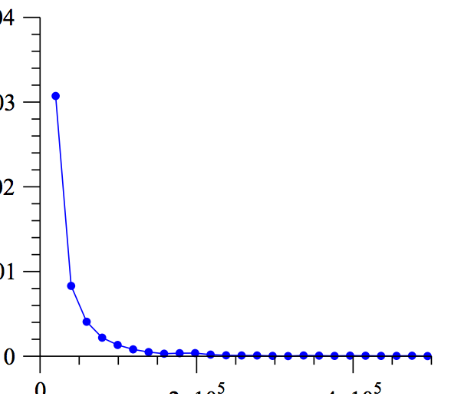

Below is a visualization of the probability density of a zipf distribution.  A probability density function, or pdf, provides the probability of realizing a range of values in a distribution through integration.

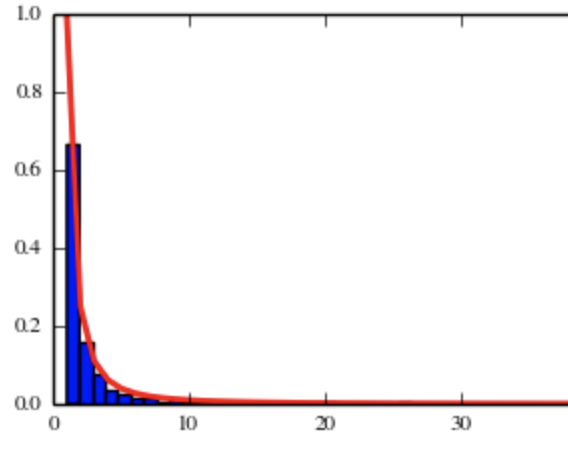

Below is an example of the cumulative density function, or cdf, of a zipf distribution. A cdf demonstrates the density of values in a given distribution.  For zipf distributions, we can interpret the cdf as the y-axis showing the proportion of values left, as x increases.  Thus, because a zipf distribution decreases exponentially fast, we see the cdf rapidly increases, resembling a logarithmic function. 

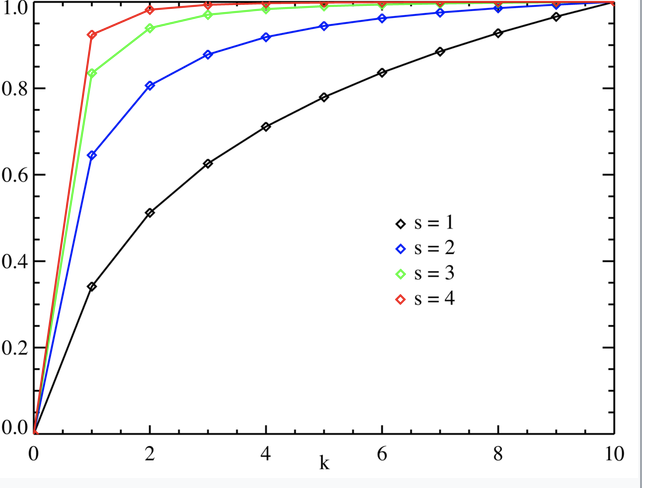

# Comparing COVID dist. to Zipf

Okay.  Now that we know some basic properties of Zipf distributions, let's examine our covid data. Here we reproduce the chart from the end of quesiton 4, but view it as a scatterplot instead of a line graph.  The distribution is not exactly a zipf, but has similar qualities showing rapid exponential decay.

In [ ]:
plt.plot(date,current_hos,
         marker = 'o', linestyle = '');

We can also view the data as a histogram, which resembles a zipf distribution much more.

In [ ]:
current_hos.hist(grid=False)

Let's explore some other variables in our covid dataset!

Below we repeat what we did for new hospitalizations with the increase of positive cases and create a scatterplot.  This has a similar distribution to new hospitalizations, which is expected. 

In [ ]:
current_pos = df['positive_increase']
plt.plot(date,current_pos,
         marker = 'o', linestyle = '');

The histogram for daily increases in positive cases looks more uniform, especially as x approaches infinity.  Thus, daily increases in hospitalizations looks more promising to resemble a Zipf distribution.

In [ ]:
current_pos.hist(grid=False)

Let's explore one last variable: the daily new deaths from COVID.  We repeat the process of creating the vector and scatterplots.  We see another skewed right, exponential- decay-resembling function, but it is not as steep as the other two variables.

In [ ]:
current_death = df['death_increase']
plt.plot(date,current_death,
         marker = 'o', linestyle = '');

To recap, the daily increase in hospitalizations appears to be the closest to a Zipf distribution because of its steep exponential decay. 

Our next step is to approximate the pdf of our variables. To do this we import the seaborn package.

In [ ]:
import seaborn as sns

In the seaborn package, we can use the sns.kdeplot() function to approximate the pdf.  The approximate pdf of the incresase of hospitalizations is skewed right, but the decay is not as rapid as we were expecting.

In [ ]:
sns.kdeplot(current_hos)

The approximate pdf for daily new positive cases is even less resembling of a Zipf because of its two large humps.

In [ ]:
sns.kdeplot(current_pos)

Interestingly, the approximate pdf of the daily new deaths most resembles the pdf of a Zipf distirbution.  It does not demonstrate swift exponential decay, but this is interesting because it has the closest pdf to the Zipf, but did not resemble a Zipf when we looked at the scatterplot.

In [ ]:
sns.kdeplot(current_death)

Lastly, let's examine the cdfs of our three variables.

Below is the cdf of the daily new hospitalizations.

In [ ]:
cdf_hos = Cdf.from_seq(current_hos)
cdf_hos.plot()

Below is the cdf of the daily new positive cases.

In [ ]:
cdf_pos = Cdf.from_seq(current_pos)
cdf_pos.plot()

Below is the cdf of the daily new deaths.

In [ ]:
cdf_death = Cdf.from_seq(current_death)
cdf_death.plot()

When comparing the three CDFs, the daily hospitalizations most resembles the logarithmic shape of a Zipf distribution.  The resemblence is relatively strong, in my opinion.

In conclusion....

Out of the three variables I examined, the daily increase of hospitalizations has the closest distribution and cdf to a Zipf distribution.  The distribution in the histogram and scatterplot appears to be rapidly declining, yet not quite as rapid as a Zipf.  The cdf is also very close to the zipf because it rapidly increases, but does not occur until x = 2000.  The daily increase in hospitalizations is the closest to a Zipf distribution, but does not exactly follow the Zipf.